In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
# len(cities)

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | samusu
City not found. Skipping...
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | ambon
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | valencia
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | alta floresta
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 13 of Set 1 | dunedin
Processing Record 14 of Set 1 | fengrun
Processing Record 15 of Set 1 | lerwick
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | port-gentil
Processing Record 19 of Set 1 | tigil
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | bathsheba
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set

Processing Record 40 of Set 4 | tura
Processing Record 41 of Set 4 | saldanha
Processing Record 42 of Set 4 | laguna
Processing Record 43 of Set 4 | castro
Processing Record 44 of Set 4 | acaponeta
Processing Record 45 of Set 4 | xuzhou
Processing Record 46 of Set 4 | sataua
City not found. Skipping...
Processing Record 47 of Set 4 | zenzeli
Processing Record 48 of Set 4 | gallup
Processing Record 49 of Set 4 | nguiu
City not found. Skipping...
Processing Record 50 of Set 4 | aflu
City not found. Skipping...
Processing Record 1 of Set 5 | san vicente de chucuri
Processing Record 2 of Set 5 | mehamn
Processing Record 3 of Set 5 | abiy adi
City not found. Skipping...
Processing Record 4 of Set 5 | salym
Processing Record 5 of Set 5 | kasongo
Processing Record 6 of Set 5 | cherepovets
Processing Record 7 of Set 5 | gonen
Processing Record 8 of Set 5 | fortuna
Processing Record 9 of Set 5 | katsuura
Processing Record 10 of Set 5 | mathbaria
Processing Record 11 of Set 5 | tuktoyaktuk
Proce

Processing Record 27 of Set 8 | cayenne
Processing Record 28 of Set 8 | puerto padre
Processing Record 29 of Set 8 | astaneh-ye ashrafiyeh
Processing Record 30 of Set 8 | karamea
City not found. Skipping...
Processing Record 31 of Set 8 | lagoa
Processing Record 32 of Set 8 | yonibana
Processing Record 33 of Set 8 | gat
Processing Record 34 of Set 8 | kalinagar
Processing Record 35 of Set 8 | vaitape
Processing Record 36 of Set 8 | vila
Processing Record 37 of Set 8 | odienne
Processing Record 38 of Set 8 | georgetown
Processing Record 39 of Set 8 | mpongwe
Processing Record 40 of Set 8 | beringovskiy
Processing Record 41 of Set 8 | urbano santos
Processing Record 42 of Set 8 | marzuq
Processing Record 43 of Set 8 | isla aguada
Processing Record 44 of Set 8 | winslow
Processing Record 45 of Set 8 | champasak
Processing Record 46 of Set 8 | channel-port aux basques
Processing Record 47 of Set 8 | mar del plata
Processing Record 48 of Set 8 | namatanai
Processing Record 49 of Set 8 | mon

Processing Record 15 of Set 12 | belmopan
Processing Record 16 of Set 12 | mogadishu
Processing Record 17 of Set 12 | ocampo
Processing Record 18 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 19 of Set 12 | dongsheng
Processing Record 20 of Set 12 | awbari
Processing Record 21 of Set 12 | saint-pierre
Processing Record 22 of Set 12 | beidao
Processing Record 23 of Set 12 | grand centre
City not found. Skipping...
Processing Record 24 of Set 12 | folldal
Processing Record 25 of Set 12 | umm kaddadah
Processing Record 26 of Set 12 | pyay
Processing Record 27 of Set 12 | hohhot
Processing Record 28 of Set 12 | kieta
Processing Record 29 of Set 12 | isangel
Processing Record 30 of Set 12 | desaguadero
Processing Record 31 of Set 12 | flinders
Processing Record 32 of Set 12 | toliary
City not found. Skipping...
Processing Record 33 of Set 12 | tomatlan
Processing Record 34 of Set 12 | amapa
Processing Record 35 of Set 12 | sume
Processing Record 36 of Set 12 | kla

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.52,-28.70,60.82,58,51,6.24,PT,2020-11-08 22:49:21
1,Cape Town,-33.93,18.42,57.20,62,20,6.93,ZA,2020-11-08 22:45:44
2,Ambon,-3.70,128.18,84.00,88,100,1.99,ID,2020-11-08 22:50:06
3,Bambous Virieux,-20.34,57.76,73.40,88,40,4.70,MU,2020-11-08 22:50:11
4,Valencia,39.33,-0.83,57.00,85,99,1.01,ES,2020-11-08 22:52:41


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2020-11-08 22:49:21,38.52,-28.70,60.82,58,51,6.24
1,Cape Town,ZA,2020-11-08 22:45:44,-33.93,18.42,57.20,62,20,6.93
2,Ambon,ID,2020-11-08 22:50:06,-3.70,128.18,84.00,88,100,1.99
3,Bambous Virieux,MU,2020-11-08 22:50:11,-20.34,57.76,73.40,88,40,4.70
4,Valencia,ES,2020-11-08 22:52:41,39.33,-0.83,57.00,85,99,1.01


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
# today

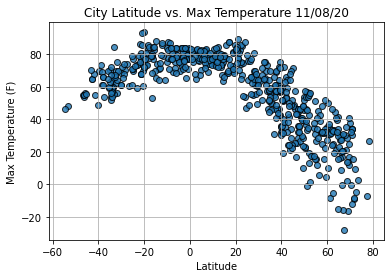

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

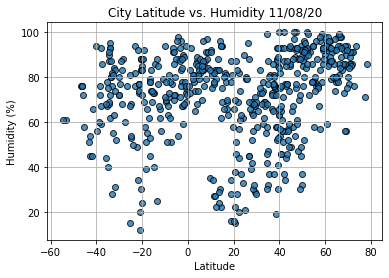

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

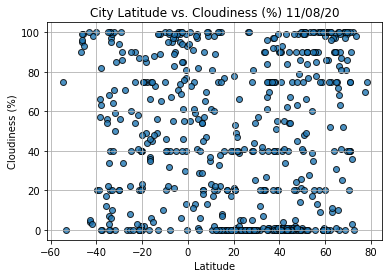

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

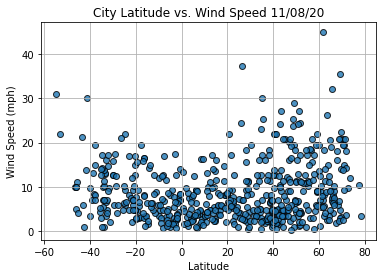

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# index13 = city_data_df.loc[13]
# index13

In [23]:
# index13 = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# index13.head()

In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2020-11-08 22:49:21,38.52,-28.70,60.82,58,51,6.24
4,Valencia,ES,2020-11-08 22:52:41,39.33,-0.83,57.00,85,99,1.01
7,Jamestown,US,2020-11-08 22:46:32,42.10,-79.24,66.20,37,1,3.51
9,Hilo,US,2020-11-08 22:49:18,19.73,-155.09,86.00,58,40,8.05
11,Fengrun,CN,2020-11-08 22:55:36,39.83,118.12,36.00,63,0,3.00


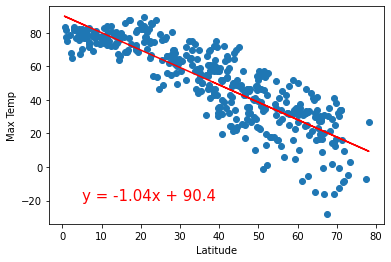

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(5,-20))

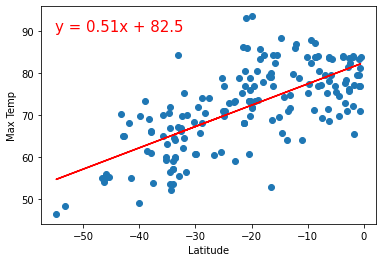

In [35]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-55,90))

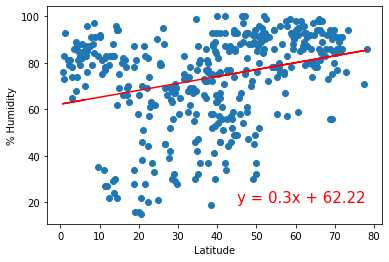

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(45,20))

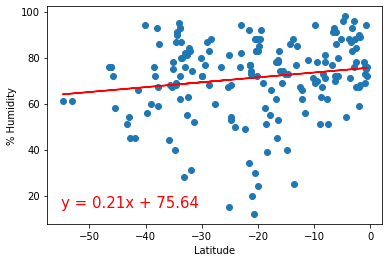

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Humidity''', '% Humidity',(-55,15))

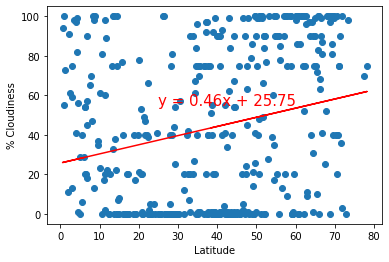

In [47]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for % Cloudiness''', '% Cloudiness',(25,55))

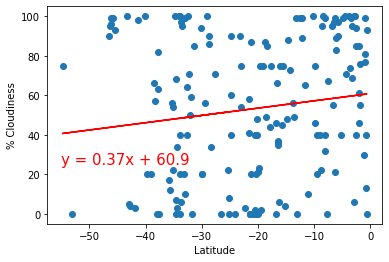

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness''', '% Cloudiness',(-55,25))

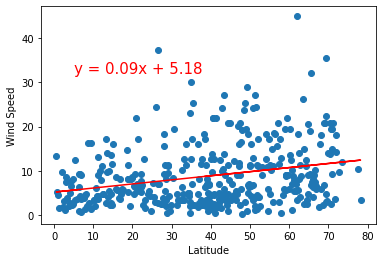

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(5,32))

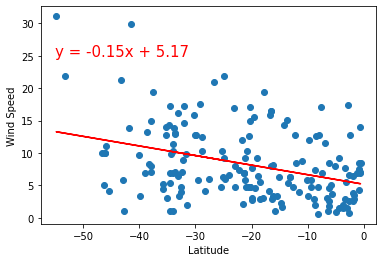

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(-55,25))